### To Do 

* run for 10 years

https://medium.com/analytics-vidhya/utilizing-twint-and-textblob-for-scraping-and-sentimenet-analysis-of-caucasianjamess-tweets-c1c548f52bbb

1. Check textblob - can I improve the sentiment score??

2. get customer satisfaction index (CSI) numbers - do they correlate to the Twitter sentiment 

# Project: Bank Sentiment Analysis 

## Summary 
Compare customer sentiment of the top 4 Banks in South Africa via rolling twitter sentiment scores 
Identify the banks with the most satisfied customer base

#### Operations
Twint to scrape tweets of the top 4 banks in South Africa \
Clean tweets with WordPunctTokenizer and Regex \
TextBlog to process sentiment of tweets 
Matplotlib / Seaborn to visualise data 
#### Project 2:
Compare results to the Customer Satifaction Index (CSI) and determine if the CSI is a correct reflection of the consumer sentimen
-> CSI is obtained by ____
#### Project 3:
Bank outages play a large factor in the customer sentiment and overall customer satisfaction 

use:https://downdetector.co.za/

## Twint quick guide

https://github.com/Slyth3/Twitter_NLP/blob/main/Quick%20Twint%20Code.txt

Github - https://github.com/twintproject/twint

In [54]:
import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()            #for compatibility issues with twint
import matplotlib.pyplot as plt
import glob # for pandas concat
import os
#import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import seaborn as sns

#cleaning
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords             

# NLP
from textblob import TextBlob

#word cloud and stopwords
from wordcloud import WordCloud

### Configure and run Twint (twitter scrapper)

In [55]:
def twintConfig_CSV(date_from,date_to, search_vals): 
    c = twint.Config()
    c.Search = search_string[1]
    c.Lang = "en"
    c.Since = date_from
    c.Until = date_to
    c.Store_csv = True
    c.Output = "Full_"+search_string[0]+".csv"
    c.Resume = "resume_id_"+search_string[0]+".txt"
    twint.run.Search(c)
    
def twintConfig_pandas(date_from,date_to, search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Lang = "en"
    c.Since = date_from
    c.Until = date_to
    c.Pandas = True
    c.Resume = "resume_id_"+search_string[0]+".txt"
    twint.run.Search(c)

### Run twint

In [56]:
#bank_search = {"FNB":"FNBSA", "StandardBank":"StandardBankZA OR \"Standard Bank\" OR \"standard bank\"","Nedbank":"Nedbank OR nedbank","ABSA": "Absa OR ABSA OR absa OR AbsaSouthAfrica"}
bank_search = {"FNB":"FNBSA", "StandardBank":"StandardBankZA OR \"Standard Bank\" OR \"standard bank\""}
since = "2021-09-14"
until = "2021-09-16"

def Run_Twint_pandas(search_vals):
    
    #set empty dataframe
    Final_df= pd.DataFrame()
    
    for bank in search_vals.items():
        print ("running: "+bank[0]+"\n")
        print ("Search string: "+bank[1]+"\n")
        
        #run twint CSV
        twintConfig_pandas(since,until, bank)
        
        #get dataframe
        tweets_df = twint.storage.panda.Tweets_df
        
        #join Dataframes, create csv and create Bank name column
        tweets_df["Bank"]= bank[0]
        tweets_df.to_csv("pre_cleaning_"+bank[0]+".csv")
        Final_df = pd.concat([Final_df,tweets_df])
        
    return Final_df

In [10]:
tweets_df = Run_Twint_pandas(bank_search)
#Run_Twint_pandas(bank_search)

running: FNB

Search string: FNBSA

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
running: StandardBank

Search string: StandardBankZA OR "Standard Bank" OR "standard bank"

1437922159498723328 2021-09-15 01:32:12 +0200 <ishanviconstru1> Send  any one that is available on the list ASAP. I Need account for wire loading. No online logins. Just normal bank details to receive $100k  (1) DB London  (2) BNP Paribas Singapore  (3) BNP Paribas France  (4) BNP Paribas Germany  (5) Standard Bank Switzerland  (6) Standard
1437918949199396870 2021-09-15 01:19:27 +0200 <Junior08790429> **I don't know Lucas Leung tied to other staff. Or Lucas mok or audi or those guys from goldan Sachs and standard bank criminal scams.**  But I know this one 🤔
1437918773768507398 2021-09-15 01:18:45 +0200 <DanielMashaba2> #Ucount with @StandardBankZA every purchase earns you points 🤗
1437905019307708416 2021-09-15 00:24:06 +0200 <Cybr_Awareness> ATM’s should have an option to choos

1437800824177152005 2021-09-14 17:30:04 +0200 <tshego_foster> Standard bank has been driving me insane these past few days 😩.
1437799808379592710 2021-09-14 17:26:02 +0200 <WeSolve4x> Banking Details #R10GoesALongWay Bank name: Standard Bank South Africa Branch code: 051001 Account holder: WESOLVE4X FOUNDATION NPC  Account number: 10144592663 Account type: CURRENT SWIFT code: SBZAZAJJ  All donations are tax deductable  Registered PBO No.: 930066035  https://t.co/jHvCm00DXh
1437799626657107970 2021-09-14 17:25:18 +0200 <Ipeleng101> ???? .@StandardBankZA
1437798729483005957 2021-09-14 17:21:44 +0200 <WeSolve4x> @mlondikaziee @KabeloMohlah02 @DBE_SA @NGOBESETsietsi Banking Details #R10GoesALongWay Bank name: Standard Bank South Africa Branch code: 051001 Account holder: WESOLVE4X FOUNDATION NPC  Account number: 10144592663 Account type: CURRENT SWIFT code: SBZAZAJJ  All donations are tax deductable  Registered PBO No.: 930066035
1437797165661925381 2021-09-14 17:15:31 +0200 <WeSolve4x> @K

1437737190684078087 2021-09-14 13:17:12 +0200 <AbutiMatt> Love it, wish @StandardBankZA can be on Apple Pay soon
1437734068066586634 2021-09-14 13:04:48 +0200 <Bhekala1> Manager - Standard Bank - Gauteng  https://t.co/C8vAS99Eej #joblinks #resume
1437733490456473600 2021-09-14 13:02:30 +0200 <BMDaily1> Take control of your finances with Standard Bank’s My360 app  https://t.co/OSCOOKvFIw
1437732927165636613 2021-09-14 13:00:16 +0200 <BusinessTechSA> [Promoted] Take control of your finances with Standard Bank’s My360 app  https://t.co/fIJ0gpRy70
1437731517032280067 2021-09-14 12:54:40 +0200 <uSamukelokuhleM> It's the new Heineken ad for me...  Also Standard bank throwing shade at the other Banks for having black cards... Lol
1437727379418488838 2021-09-14 12:38:13 +0200 <Thabang4real> WHO ARE THE STANDARD BANK CHENIN BLANC TOP TEN CHALLENGE 2021 WINNERS? @StandardBankArt #4realness   https://t.co/J4SnnAplEe
1437726621008601090 2021-09-14 12:35:12 +0200 <jeremyproome> @StandardBankZA is s

1437679378310344707 2021-09-14 09:27:29 +0200 <AfroBirdTail> @potegokajesus @MfokaMqulusi @StandardBankZA Standard bank is just fraud!
1437678761579794434 2021-09-14 09:25:02 +0200 <AfroBirdTail> @StandardBankZA @potegokajesus Why have charges on an account with zero balance? What are you managing there?
1437676253021102081 2021-09-14 09:15:04 +0200 <YungDunamo17> @StandardBankZA I've sent a dm
1437674392935407617 2021-09-14 09:07:40 +0200 <Bhekala1> Head - Standard Bank - Gauteng  https://t.co/4Ui4njNRs7 #resume #joblinks
1437674105378164741 2021-09-14 09:06:32 +0200 <Bhekala1> Manager - Standard Bank - Gauteng  https://t.co/GnkN3sprj2 #resume #joblinks
1437673903262994434 2021-09-14 09:05:43 +0200 <Numinous09> Friendly reminder that one of @StandardBankZA @SBGroup Head of Operations stole over R500k from my disabled grandmothers account and they are protecting him #ItCanBe
1437673476840624142 2021-09-14 09:04:02 +0200 <Bhekala1> Specialist - Standard Bank - Gauteng  https://t.co/WP1T

1437601539074535427 2021-09-14 04:18:10 +0200 <Pi73366052> @NgunesiJoy @MfokaMqulusi @StandardBankZA Same here
1437601112425652225 2021-09-14 04:16:29 +0200 <Pi73366052> @potegokajesus @MfokaMqulusi @StandardBankZA Standard bank vele ke shit
1437600468599984133 2021-09-14 04:13:55 +0200 <SahlukoTheeDyan> @VusiN5 @MondliBrianZum1 @MfokaMqulusi Standard Bank is the best from varsity days
1437599747641122817 2021-09-14 04:11:03 +0200 <TheAfricaReport> Standard Bank is planning new partnerships in products and distribution as it seeks to sustain its first-half recovery, says Lungisa Fuzile, head of #SouthAfrica.  Report by @whitehouse789.    https://t.co/N2o5MpkJsx
1437598336190754825 2021-09-14 04:05:27 +0200 <Bhekala1> Banker - Standard Bank - Gauteng  https://t.co/y7lDsDVWmn #joblinks #CV
1437598046683115529 2021-09-14 04:04:18 +0200 <Bhekala1> Manager - Standard Bank - Gauteng  https://t.co/PACAwYLGsv #joblinks #CV
1437593787199590403 2021-09-14 03:47:22 +0200 <GwebaBuhle> @MfokaMqulus

# EDA

In [80]:
#Export/Import csv

#tweets_df.to_csv("pre_cleaning_All.csv")
tweets_df= pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "Pre_cleaning_runs/*.csv"))))

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
len(tweets_df) 

369077

In [82]:
# remove unnecessary columns 
base_tweets = tweets_df[["date", "username", "tweet","language", "hashtags","retweet_id","reply_to" ,"nlikes","search","Bank"]]

#### Language analysis 

Although the language tag doesnt seem to get it right 100% of the time, we will drop these rows that arent english:
* und = undefined, this will also include tweets with only hashtags so we will keep this
*en = english 

In [86]:
base_tweets["language"].unique()

array(['en', 'und'], dtype=object)

In [87]:
# remove all rows where language is not english or undefined
base_tweets = base_tweets[base_tweets["language"].isin([ 'und', 'en'])]

Remove tweets from Bank owned accounts i.e. FNBSA


In [89]:
# remove rows where username is in bank_search - i.e. tweets from the bank
base_tweets = base_tweets[ ~base_tweets["username"].str.lower().str.contains('fnb|standardbank|nedbank|absa',regex = True)]

In [91]:
#drop duplicates if any - keep first duplicate
base_tweets = base_tweets.drop_duplicates(keep="first")

In [93]:
# reset the index for joining later 
base_tweets.reset_index(inplace=True)
base_tweets.drop("index",axis =1,inplace=True)

In [94]:
len(base_tweets)

288369

### Visualisation pre-clean

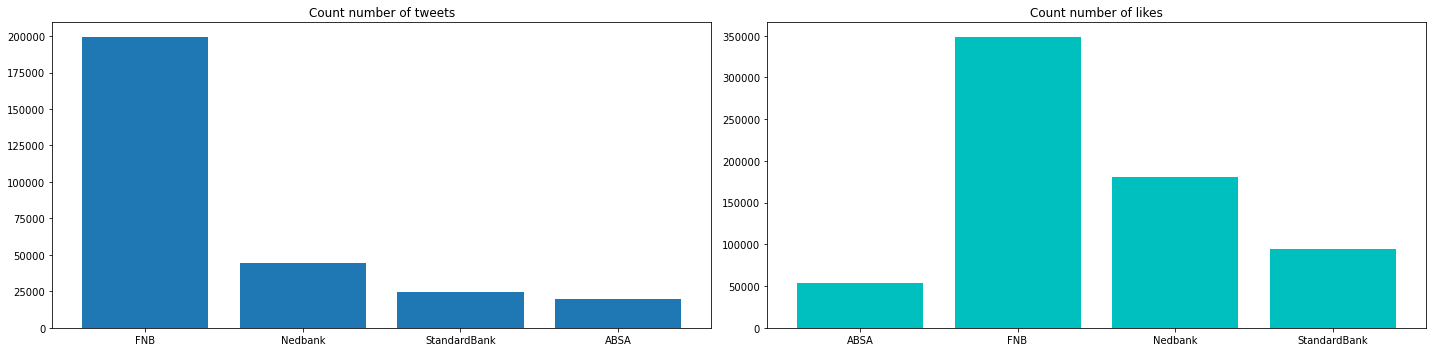

In [95]:
fig, ax = plt.subplots(1,2, figsize= (20,5))

ax[0].bar(base_tweets["Bank"].value_counts().index, base_tweets["Bank"].value_counts() )
ax[0].set_title("Count number of tweets")

#get number of likes
nlikes = base_tweets[["Bank","nlikes"]].groupby("Bank").sum()
ax[1].bar(nlikes.index, nlikes["nlikes"], color = "c")
ax[1].set_title("Count number of likes")

plt.tight_layout()
plt.show()

### Cleaning tweet data 
Remove punctuation and symbols

***Note*** Due to an issue with multiprocessing in Jupyter notebooks we have to put the cleaning code in a .py file in our project folder
This file is imported and the code run

In [96]:
# code is in multi_clean file 
'''
def link_at_s_removal(text):  
    pat1 = r'@_?[A-Za-z0-9]+'  # @[A-Za-z0-9]+
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4))
    text = re.sub(combined_pat,"",text)
    return text

def clean_text(text): 
    text=link_at_s_removal(text)
    
    text = re.sub('[^A-Za-z\s]', '', text.lower())        #remove non-alphabet
    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stopwords.words()
    ]
    return ' '.join(clean_text)
'''

'\ndef link_at_s_removal(text):  \n    pat1 = r\'@_?[A-Za-z0-9]+\'  # @[A-Za-z0-9]+\n    pat2 = r\'https?://[A-Za-z0-9./]+\'  \n    pat3 = r\'\'s\'                      #floating s\'s\n    pat4 = r\'\\#\\w+\'\n    combined_pat = r\'|\'.join((pat1, pat2,pat3,pat4))\n    text = re.sub(combined_pat,"",text)\n    return text\n\ndef clean_text(text): \n    text=link_at_s_removal(text)\n    \n    text = re.sub(\'[^A-Za-z\\s]\', \'\', text.lower())        #remove non-alphabet\n    tokenized_text = WordPunctTokenizer().tokenize(text) #tokenize\n    clean_text = [\n         word for word in tokenized_text\n         if word not in stopwords.words()\n    ]\n    return \' \'.join(clean_text)\n'

#### run tween cleaner

In [98]:
import multi_clean
import multiprocessing as mp
from multiprocessing import  Pool

In [16]:
%%time
p = mp.Pool(mp.cpu_count())
cleaned_list = p.map(multi_clean.clean_text,base_tweets["tweet"])
p.close()

Wall time: 25min


In [17]:
##make a dataframe for sentiment analysis
clean_df = pd.DataFrame(cleaned_list,columns=['tweet'])

In [18]:
#drop empty tweet rows
clean_df = clean_df [ ~(clean_df["tweet"] =="")]

In [19]:
clean_df.head()

,tweet
0,could aimed higher return smarter savings saying
1,greatnkanyim rules clear brother lodge complai...
2,think sd blocked transactions ive similar posi...
3,hie transfer money capitec hrs still nothing i...
4,iam worried


## Sentiment analysis (TextBlob)

In [20]:
%%time
for index, row in clean_df.iterrows():
    tweet = clean_df.at[index, 'tweet']

    #run sentiment using TextBlob
    analysis = TextBlob(tweet)

    #set value to dataframe
    clean_df.at[index, 'polarity'] = analysis.sentiment[0]
    clean_df.at[index, 'subjectivity'] = analysis.sentiment[1]

    #Create Positive / negative column depending on polariity
    if analysis.sentiment[0]>0:

        clean_df.at[index, 'Sentiment'] = "Positive"
        #printmd('Positive', color="green")

    elif analysis.sentiment[0]<0:

        clean_df.at[index, 'Sentiment'] = "Negative"
    else:

        clean_df.at[index, 'Sentiment'] = "Neutral"

Wall time: 13.2 s


In [21]:
clean_df.to_csv("cleaned.csv")
clean_df.head()

,tweet,polarity,subjectivity,Sentiment
0,could aimed higher return smarter savings saying,0.250000,0.500000,Positive
1,greatnkanyim rules clear brother lodge complai...,-0.190000,0.296667,Negative
2,think sd blocked transactions ive similar posi...,-0.333333,0.466667,Negative
3,hie transfer money capitec hrs still nothing i...,0.000000,0.666667,Neutral
4,iam worried,0.000000,0.000000,Neutral


## Merge cleaned and original 

In [22]:
Final_df = pd.merge(clean_df, base_tweets, left_index=True, right_index=True)

In [23]:
Final_df = Final_df.rename(columns={"tweet_x": "cleaned_tweet", "tweet_y": "Base_tweet"})
Final_df.head(2)

,cleaned_tweet,polarity,subjectivity,Sentiment,date,username,Base_tweet,language,hashtags,retweet_id,reply_to,nlikes,search,Bank
0,could aimed higher return smarter savings saying,0.25,0.500000,Positive,2021/06/19 15:54,saminspyr,@melisentiaphe10 @Nedbank You could have also ...,en,[],NaN,"[{'screen_name': 'melisentiaphe10', 'name': 'Q...",0,Nedbank OR nedbank,Nedbank
1,greatnkanyim rules clear brother lodge complai...,-0.19,0.296667,Negative,2021/06/19 16:34,wele50568636,@NWelikhosi @D_Great_NkanyiM @robertmarawa The...,en,[],NaN,"[{'screen_name': 'NWelikhosi', 'name': 'Ndaba ...",3,Nedbank OR nedbank,Nedbank


## Create rolling Mean / Expanding 

In [24]:
Final_df["date"] = pd.to_datetime(Final_df["date"])

#set index = date so as to create rolling mean 
Final_df = Final_df.sort_values('date').set_index('date')

In [25]:
#Create bank Dataframes 
Standard_df = Final_df[(Final_df.Bank=="StandardBank")]
FNB_df = Final_df[(Final_df.Bank=="FNB")]
Nedbank_df = Final_df[(Final_df.Bank=="Nedbank")]
ABSA_df = Final_df[(Final_df.Bank=="ABSA")]

#### Get rolling/ expanding mean 

In [45]:
# stop this warning as the chaining is fine
pd.options.mode.chained_assignment = None 

#Total
Final_df['mean'] = Final_df['polarity'].expanding().mean()
Final_df['rolling'] = Final_df['polarity'].rolling("1d").mean()

#Std Bank
Standard_df['mean'] = Standard_df['polarity'].expanding().mean()
Standard_df['rolling'] = Standard_df['polarity'].rolling("1d").mean()

#FNB
FNB_df['mean'] = FNB_df['polarity'].expanding().mean()
FNB_df['rolling'] = FNB_df['polarity'].rolling("1d").mean()

#Nebank
Nedbank_df['mean'] = Nedbank_df['polarity'].expanding().mean()
Nedbank_df['rolling'] = Nedbank_df['polarity'].rolling("1d").mean()

#ABSA
ABSA_df['mean'] = ABSA_df['polarity'].expanding().mean()
ABSA_df['rolling'] = ABSA_df['polarity'].rolling("1d").mean()

## Analysis and visualisation

In [46]:
# number of tweets
Final_df[["cleaned_tweet","Bank"]].groupby(["Bank"]).count().transpose()

Bank,Nedbank,StandardBank
cleaned_tweet,27752,4124


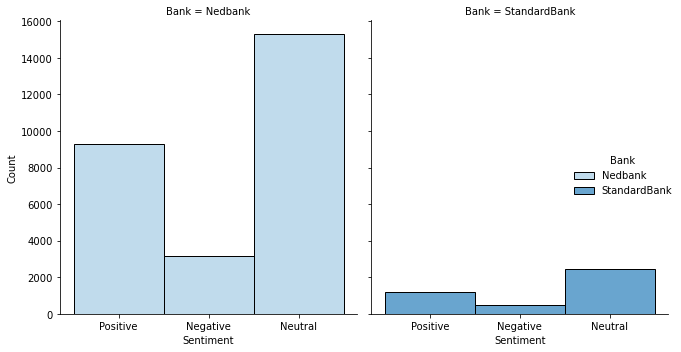

In [47]:
sns.displot(
    Final_df, x="Sentiment", col="Bank",
    binwidth=3 , hue="Bank",palette="Blues", aspect=0.8)
plt.tight_layout()

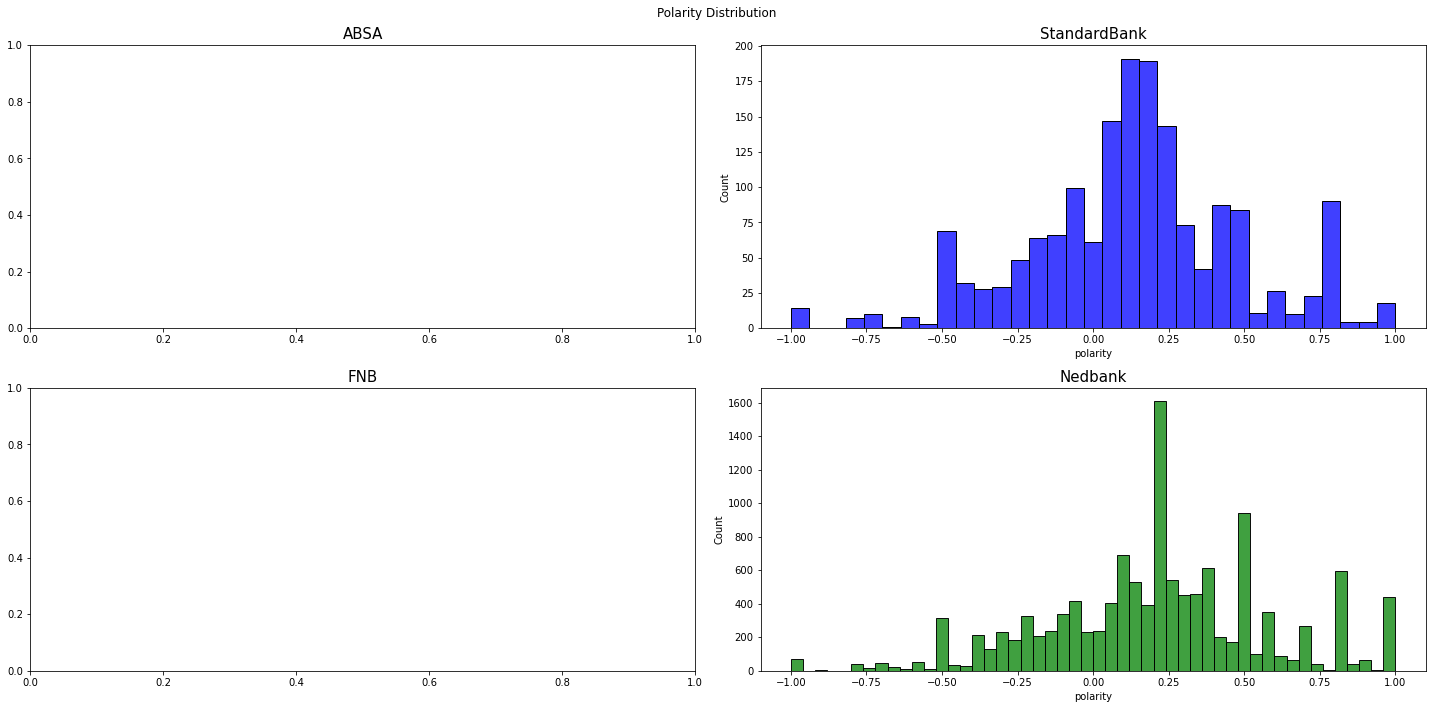

In [48]:
fig, axes = plt.subplots(2, 2,figsize=(20, 10))
fig.suptitle('Polarity Distribution')

#NB - remove the neutral values 
# absa
sns.histplot(ax=axes[0,0], data = ABSA_df['polarity'][~(ABSA_df['polarity']==0)], color = "r")
axes[0,0].set_title("ABSA", fontsize = 15)

#StandardBank
sns.histplot(ax=axes[0,1], data= Standard_df['polarity'][~(Standard_df['polarity']==0)], color="b")
axes[0,1].set_title("StandardBank", fontsize = 15)


# FNB
sns.histplot(ax=axes[1,0], data = FNB_df['polarity'][~(FNB_df['polarity']==0)], color="c")
axes[1,0].set_title("FNB", fontsize = 15)

# Nedbank
sns.histplot(ax=axes[1,1], data = Nedbank_df['polarity'][~(Nedbank_df['polarity']==0)], color="g")
axes[1,1].set_title("Nedbank", fontsize = 15)

plt.tight_layout()
plt.show()

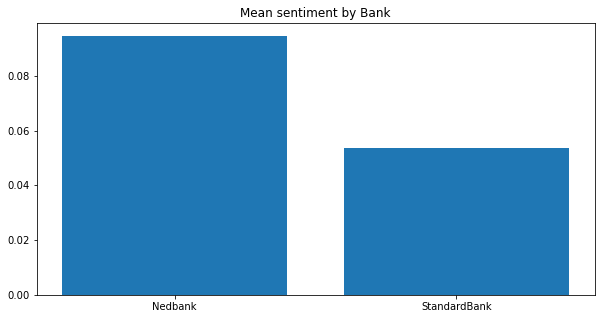

In [49]:
# Overall mean sentiment by bank
plt.figure( figsize= (10,5))
plt.bar(Final_df[["polarity","Bank"]].groupby(["Bank"]).mean().index, Final_df[["polarity","Bank"]].groupby(["Bank"]).mean()["polarity"]
       )
plt.title("Mean sentiment by Bank")
plt.show()

# Hashtag analysis 

In [50]:
#### Top 5 hastags 

In [51]:
import ast
from collections import Counter

#get all hashtags as list
def hashlist(df):
    hashlist = []
    for i in df['hashtags']:
        #ast.literal is to consider string list as a string
        hashlist.extend(ast.literal_eval(i))
    return hashlist

#Create 5 most common Hashtag values
def Create_values(hashlist):
    labels, values = zip(*Counter(hashlist).most_common(5))
    indexes = np.arange(len(labels))
    return labels,indexes,values

t_labels,t_indexes,t_values = Create_values(hashlist(Final_df))
s_labels,s_indexes,s_values = Create_values(hashlist(Standard_df))
f_labels,f_indexes,f_values = Create_values(hashlist(FNB_df))
n_labels,n_indexes,n_values = Create_values(hashlist(Nedbank_df))
a_labels,a_indexes,a_values = Create_values(hashlist(ABSA_df))

ValueError: not enough values to unpack (expected 2, got 0)

NameError: name 'f_indexes' is not defined

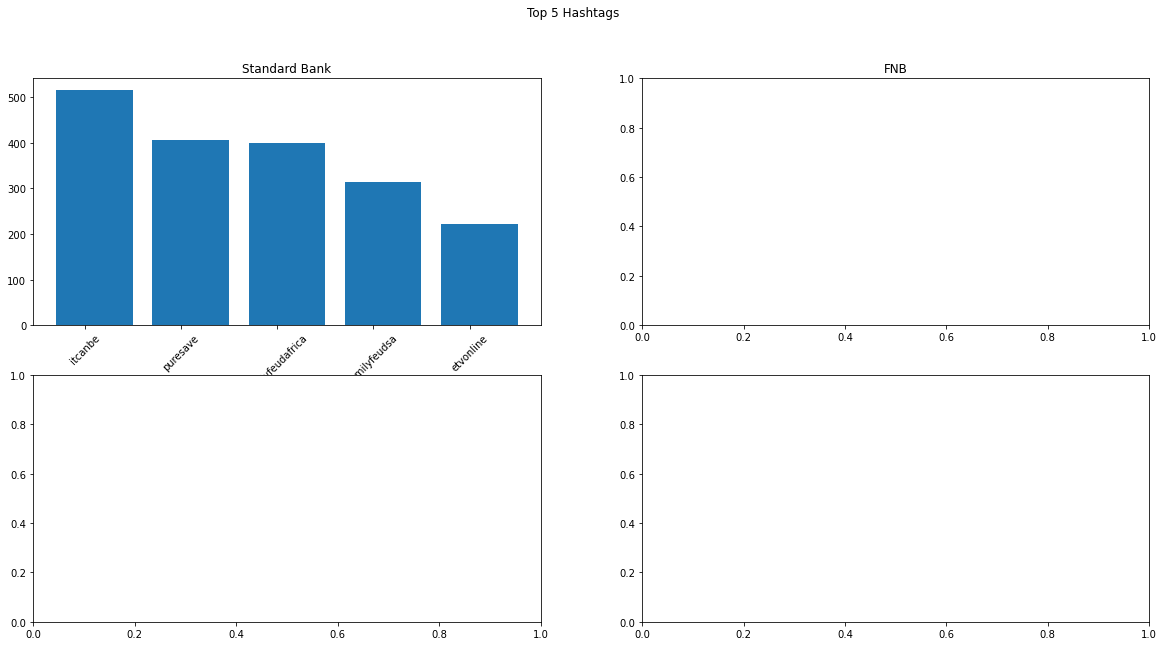

In [52]:
#plot graphs
fig, axes = plt.subplots(2, 2,figsize=(20, 10))

fig.suptitle("Top 5 Hashtags")

axes[0,0].set_title("Standard Bank")
axes[0,0].bar(s_indexes, s_values )
axes[0,0].set_xticks(np.arange(len(s_labels))-0.1)
axes[0,0].set_xticklabels(s_labels, rotation= 45)

axes[0,1].set_title("FNB")
axes[0,1].bar(f_indexes, f_values )
axes[0,1].set_xticks(np.arange(len(f_labels))-0.1)
axes[0,1].set_xticklabels(f_labels, rotation= 45)

axes[1,0].set_title("NedBank")
axes[1,0].bar(n_indexes, n_values )
axes[1,0].set_xticks(np.arange(len(n_labels))-0.1)
axes[1,0].set_xticklabels(n_labels, rotation= 45)

axes[1,1].set_title("ABSA")
axes[1,1].bar(a_indexes, a_values )
axes[1,1].set_xticks(np.arange(len(a_labels))-0.1)
axes[1,1].set_xticklabels(a_labels, rotation= 45)

plt.tight_layout()
plt.show()

# Word Cloud

In [53]:
tweetString_s = " ".join(list(Standard_df["cleaned_tweet"])).lower()
tweetString_f = " ".join(list(FNB_df["cleaned_tweet"])).lower()
tweetString_n = " ".join(list(Nedbank_df["cleaned_tweet"])).lower()
tweetString_a = " ".join(list(ABSA_df["cleaned_tweet"])).lower()

#remove bank name and set wordcloud
tweetString_s = re.sub(r"standardbankza|standard bank|bank","",tweetString_s)     
wordcloud_s = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_s)

tweetString_f = re.sub(r"FNB|fnb|bank","",tweetString_f)
wordcloud_f = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_f)

tweetString_n = re.sub(r"NedBankSA|Nedbank|nedbank|bank","",tweetString_n)   
wordcloud_n = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_n)

tweetString_a = re.sub(r"fnb|FNB|bank","",tweetString_a)
wordcloud_a = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 5).generate(tweetString_a)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(14, 8),sharey=True)

ax[0,0].imshow(wordcloud_s)
ax[0,1].imshow(wordcloud_f)
ax[1,0].imshow(wordcloud_n)
ax[1,1].imshow(wordcloud_n)

ax[0,0].axis("off")
ax[0,1].axis("off")
ax[1,0].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("StandardBank")
ax[0,1].set_title("FNB")
ax[1,0].set_title("Nedbank")
ax[1,1].set_title("ABSA")

plt.tight_layout() 
plt.show()

# Rolling plots

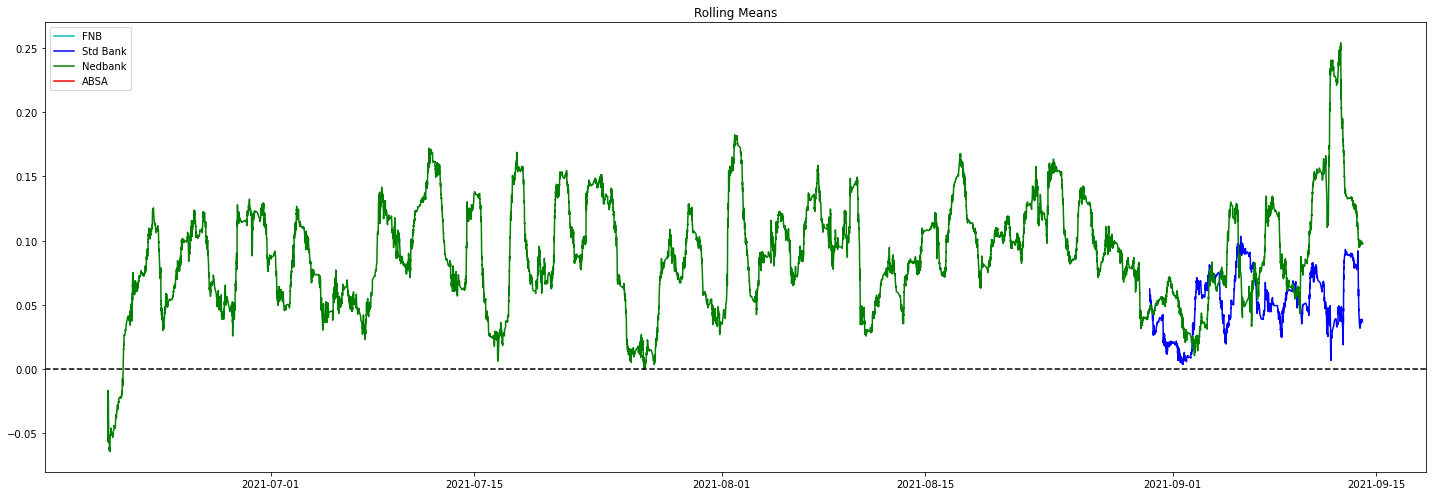

In [37]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(111)

#ax.plot(Final_df.iloc[50:].index,Final_df['rolling'].iloc[50:], color='y', label='Total rolling mean')
ax.plot(FNB_df.iloc[50:].index,FNB_df.iloc[50:]['rolling'], color ='c', label='FNB')
ax.plot(Standard_df.iloc[50:].index,Standard_df.iloc[50:]['rolling'], color ='b', label='Std Bank')
ax.plot(Nedbank_df.iloc[50:].index,Nedbank_df.iloc[50:]['rolling'], color ='g', label='Nedbank')
ax.plot(ABSA_df.iloc[50:].index,ABSA_df.iloc[50:]['rolling'], color ='r', label='ABSA')
plt.axhline(y = 0, color = 'k', linestyle = 'dashed')
plt.legend()
plt.title("Rolling Means")
plt.tight_layout()
plt.show()

### Day / Month sentiment comparison 

In [38]:
Standard_df["Day"]= Standard_df.index.day_name()
Standard_df["Month"] = Standard_df.index.month_name()
ABSA_df["Day"]= ABSA_df.index.day_name()
ABSA_df["Month"] = ABSA_df.index.month_name()
FNB_df["Day"]= FNB_df.index.day_name()
FNB_df["Month"] = FNB_df.index.month_name()
Nedbank_df["Day"]= Nedbank_df.index.day_name()
Nedbank_df["Month"] = Nedbank_df.index.month_name()

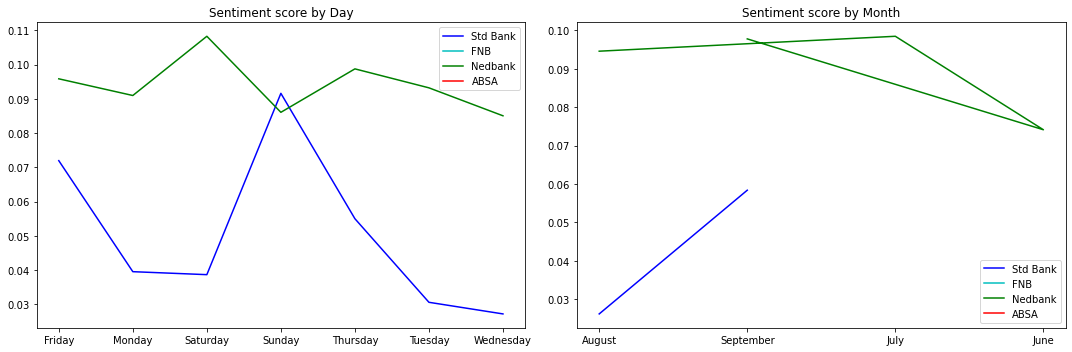

In [39]:
# Polarity by Day/Month 

fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].set_title("Sentiment score by Day")
ax[0].plot(Standard_df.groupby("Day")["polarity"].mean().index,Standard_df.groupby("Day")["polarity"].mean(), color ='b', label='Std Bank' )
ax[0].plot(FNB_df.groupby("Day")["polarity"].mean().index,FNB_df.groupby("Day")["polarity"].mean(), color ='c', label='FNB')
ax[0].plot(Nedbank_df.groupby("Day")["polarity"].mean().index,Nedbank_df.groupby("Day")["polarity"].mean(), color ='g', label='Nedbank' )
ax[0].plot(ABSA_df.groupby("Day")["polarity"].mean().index,ABSA_df.groupby("Day")["polarity"].mean(), color ='r', label='ABSA' )
ax[0].legend()

ax[1].set_title("Sentiment score by Month")
ax[1].plot(Standard_df.groupby("Month")["polarity"].mean().index,Standard_df.groupby("Month")["polarity"].mean(), color ='b', label='Std Bank' )
ax[1].plot(FNB_df.groupby("Month")["polarity"].mean().index,FNB_df.groupby("Month")["polarity"].mean(), color ='c', label='FNB')
ax[1].plot(Nedbank_df.groupby("Month")["polarity"].mean().index,Nedbank_df.groupby("Month")["polarity"].mean(), color ='g', label='Nedbank' )
ax[1].plot(ABSA_df.groupby("Month")["polarity"].mean().index,ABSA_df.groupby("Month")["polarity"].mean(), color ='r', label='ABSA' )
ax[1].legend()

plt.tight_layout()
plt.show()

In [40]:
def create_day_plot(df,ax,colour,lab):
    df["Day"] = df.index.day_name()
    x = df.groupby("Day")["polarity"].mean().index
    y = df.groupby("Day")["polarity"].mean()
    
    return ax.plot(x,y, color =colour , label = lab)

def create_month_plot(df,ax,colour,lab):
    df["Month"] = df.index.month_name()
    x = df.groupby("Month")["polarity"].mean().index
    y = df.groupby("Month")["polarity"].mean()
    
    return ax.plot(x,y, color =colour , label = lab)

def create_hr_plot(df,ax,colour,lab):
    df["Hour"] = df.index.hour
    x = df.groupby("Hour")["polarity"].mean().index
    y = df.groupby("Hour")["polarity"].mean()

    return ax.plot(x,y, color =colour , label = lab)

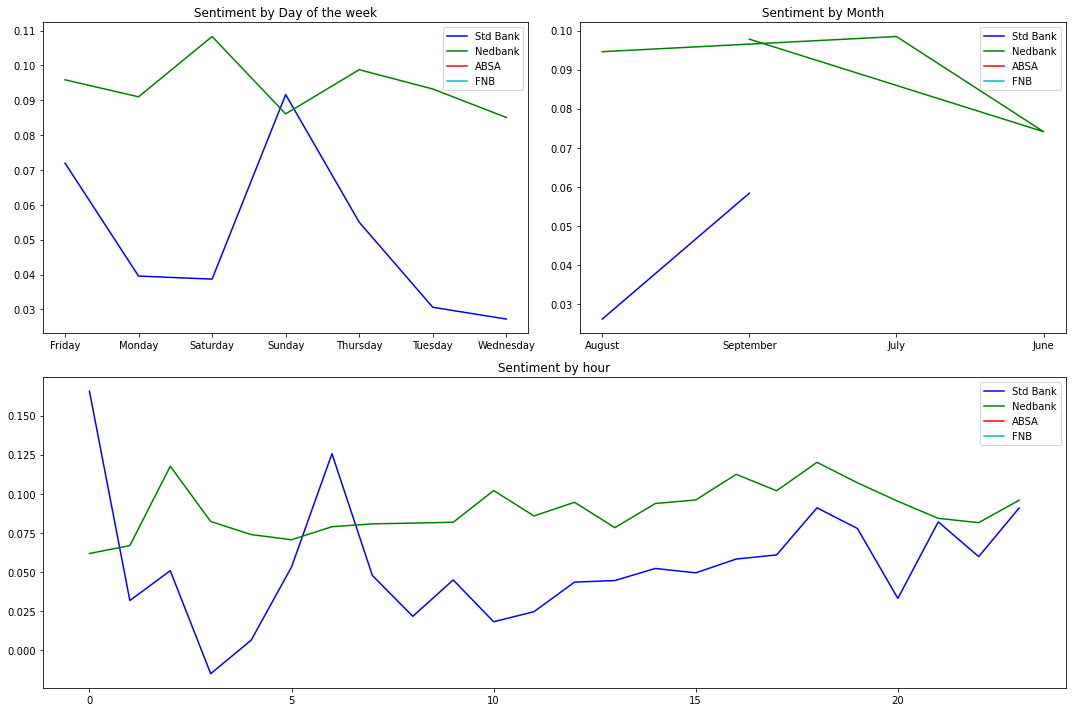

In [41]:
fig= plt.figure(figsize = (15,10))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

create_day_plot(Standard_df,ax1, "b","Std Bank" )
create_day_plot(Nedbank_df,ax1, "g","Nedbank" )
create_day_plot(ABSA_df,ax1, "r","ABSA" )
create_day_plot(FNB_df,ax1, "c","FNB" )
ax1.legend()
ax1.set_title("Sentiment by Day of the week")

create_month_plot(Standard_df,ax2, "b","Std Bank" )
create_month_plot(Nedbank_df,ax2, "g","Nedbank" )
create_month_plot(ABSA_df,ax2, "r","ABSA" )
create_month_plot(FNB_df,ax2, "c","FNB" )
ax2.legend()
ax2.set_title("Sentiment by Month")

create_hr_plot(Standard_df,ax3, "b","Std Bank" )
create_hr_plot(Nedbank_df,ax3, "g","Nedbank" )
create_hr_plot(ABSA_df,ax3, "r","ABSA" )
create_hr_plot(FNB_df,ax3, "c","FNB" )
ax3.legend()
ax3.set_title("Sentiment by hour")

plt.tight_layout()
plt.show()

In [42]:
Final_df.to_csv("Final.csv")


## Project 2: 
do outages affect sentiment 
get outages overlap to rolling mean